### Do you wanna play?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("seaborn-v0_8")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
numbers = [i for i in range(38)]

In [3]:
def roulette(initial_money, rounds, bet_on, strategy = "martingale"):
    def fibonacci(n):
        if n == 1:
            return 0
        elif n == 2:
            return 1
        a, b = 0, 1
        for _ in range(n - 2):
            a, b = b, a + b
        return b

    if bet_on == 'column':
        winning_numbers = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34]
        alpha = 3
        
    elif bet_on == 'color':
        winning_numbers = [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]
        alpha = 2

    d = []

    if strategy == 'fibonacci':
        for _ in range(250_000):

            money = initial_money
            series = 2

            for _ in range(rounds):
                if money <= 0:
                    break

                bet = fibonacci(series)
                if bet > money:
                    bet = fibonacci(series - 1)
                    if bet > money:
                        break

                money -= bet

                winner_number = np.random.choice(numbers)
                if winner_number in winning_numbers:
                    money += alpha * bet
                    series = 2
                else:
                    series += 1

            d.append(money - initial_money)

    elif strategy == 'martingale':
        for _ in range(250_000):

            money = initial_money
            series = 1

            for _ in range(rounds):
                if money <= 0:
                    break

                bet = series
                if bet > money:
                    break

                money -= bet

                winner_number = np.random.choice(numbers)
                if winner_number in winning_numbers:
                    money += alpha * bet
                    series = 1
                else:
                    series *= 2

            d.append(money - initial_money)

    d = np.array(d)

    return d

In [4]:
def data(d):
    P = round(np.count_nonzero(d > 0) / len(d) * 100, 2)

    n, bins, patches = plt.hist(d, bins = np.arange(min(d) - 0.5, max(d) + 1, 1), color = "black", edgecolor = "black")

    for i in range(len(patches)):
        if bins[i] >= 0:
            patches[i].set_facecolor('green')
        else: 
            patches[i].set_facecolor('red')

    plt.title("Histogram of gains and losses", fontweight = "bold", fontsize = 14)
    plt.xlabel("Money won/lost", fontweight = "bold", fontsize = 12)
    plt.xticks(np.arange(min(d), max(d), 10))
    plt.ylabel("Occurances", fontweight = "bold", fontsize = 12)
    plt.show()

    print(f"Probability of earning money: {P} %")

    n = [round(n[j] * 100 / np.sum(n), 3) for j in range(len(n))]
    bin_intervals = [int(bins[i] + 0.5) for i in range(len(bins) - 1)]

    df = pd.DataFrame({
        'Money difference': bin_intervals,
        'Probability': n
    })

    return df

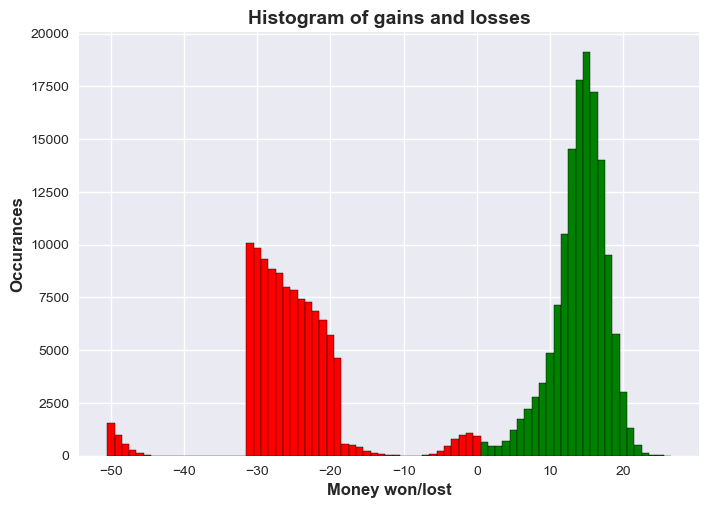

Probability of earning money: 55.68 %


,Money difference,Probability
0,-50,0.625
1,-49,0.397
2,-48,0.214
3,-47,0.101
4,-46,0.040
5,-45,0.013
6,-44,0.001
7,-43,0.002
8,-42,0.000
9,-41,0.000


In [5]:
d = roulette(initial_money = 50, rounds = 30, bet_on = "color")
data(d)

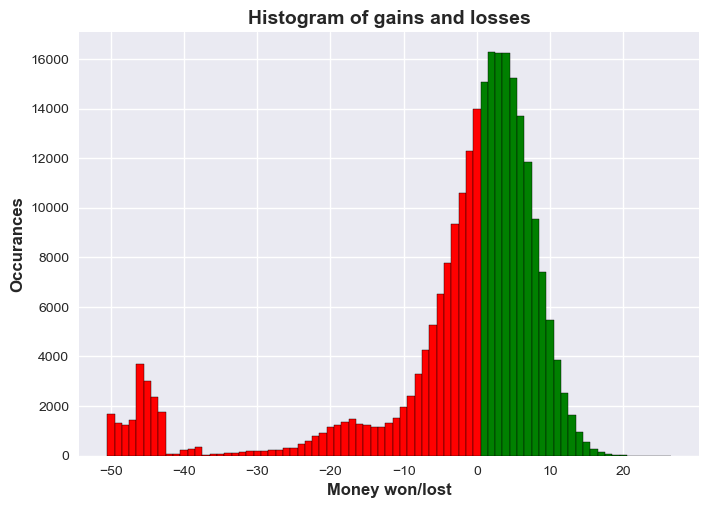

Probability of earning money: 54.82 %


,Money difference,Probability
0,-50,0.664
1,-49,0.519
2,-48,0.500
3,-47,0.577
4,-46,1.483
5,-45,1.204
6,-44,0.951
7,-43,0.708
8,-42,0.024
9,-41,0.034


In [6]:
d = roulette(initial_money = 50, rounds = 30, bet_on = "color", strategy = "fibonacci")
data(d)

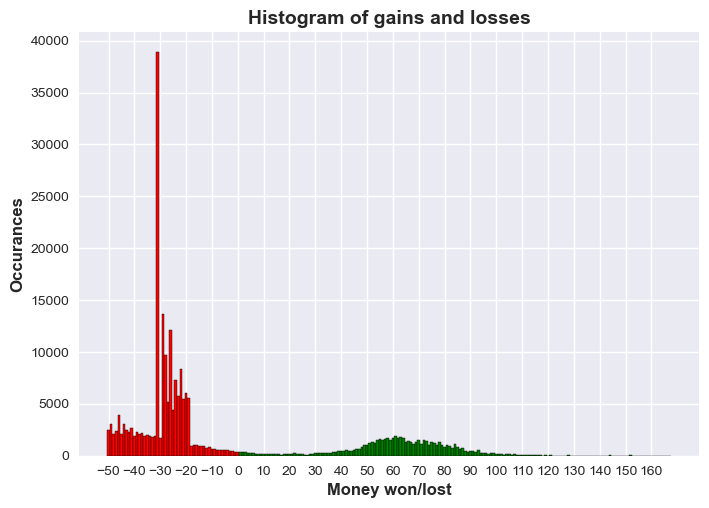

Probability of earning money: 27.48 %


,Money difference,Probability
0,-50,0.970
1,-49,1.212
2,-48,0.824
3,-47,0.955
4,-46,1.555
5,-45,0.834
6,-44,1.207
7,-43,0.992
8,-42,0.904
9,-41,1.079


In [7]:
d = roulette(initial_money = 50, rounds = 30, bet_on = "column")
data(d)

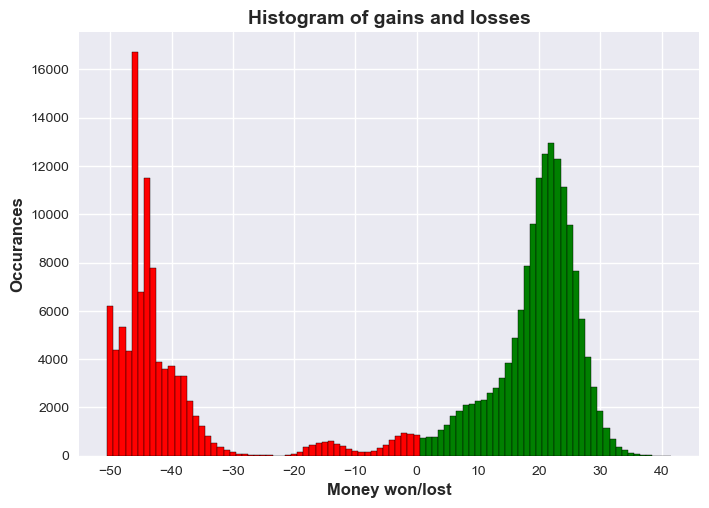

Probability of earning money: 60.97 %


,Money difference,Probability
0,-50,2.488
1,-49,1.758
2,-48,2.125
3,-47,1.737
4,-46,6.685
5,-45,2.707
6,-44,4.593
7,-43,3.116
8,-42,1.555
9,-41,1.435


In [8]:
d = roulette(initial_money = 50, rounds = 30, bet_on = "column", strategy = "fibonacci")
data(d)